## Case Study On Titanic Data

In [12]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# read the data
data = pd.read_csv("C:/Users/DISHA_COMPUTER/Documents/titanic data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preprocessing

In [13]:
# finding missing values 
missing_values=data.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.drop(["Cabin","PassengerId","Ticket"],axis=1,inplace=True)

In [15]:
age_repl=data["Age"].fillna(data["Age"].mean(),inplace=True)
age_repl

In [16]:
fare=data["Fare"].fillna(data["Fare"].mean(),inplace=True)

In [17]:
m=data.isnull().sum()
m


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
data["Sex"] = l.fit_transform(data["Sex"])
data["Embarked"] = l.fit_transform(data["Embarked"])
print(data)

     Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    1   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2           1       3                             Heikkinen, Miss. Laina    0   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4           0       3                           Allen, Mr. William Henry    1   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    1   
887         1       1                       Graham, Miss. Margaret Edith    0   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    0   
889         1       1                              Behr, Mr. Karl Howell    1   
890         0       3                                Dooley, Mr. Patrick    1   

           Age  SibSp  Parc

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int32  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 55.8+ KB


### Exploratory Data Analysis

C:\Users\DISHA_COMPUTER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


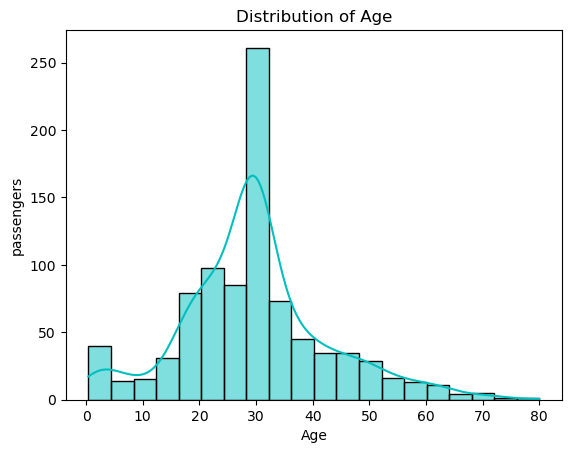

In [20]:
# Histogram
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data["Age"], bins=20, kde=True,color="c")

# Customize plot
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('passengers')

plt.show()


* Interpretation:                       
  Most passengers fall within the age range of 20 to 30 years old.              
  
The frequency decreases as age increases, with very few passengers above 70 years old 

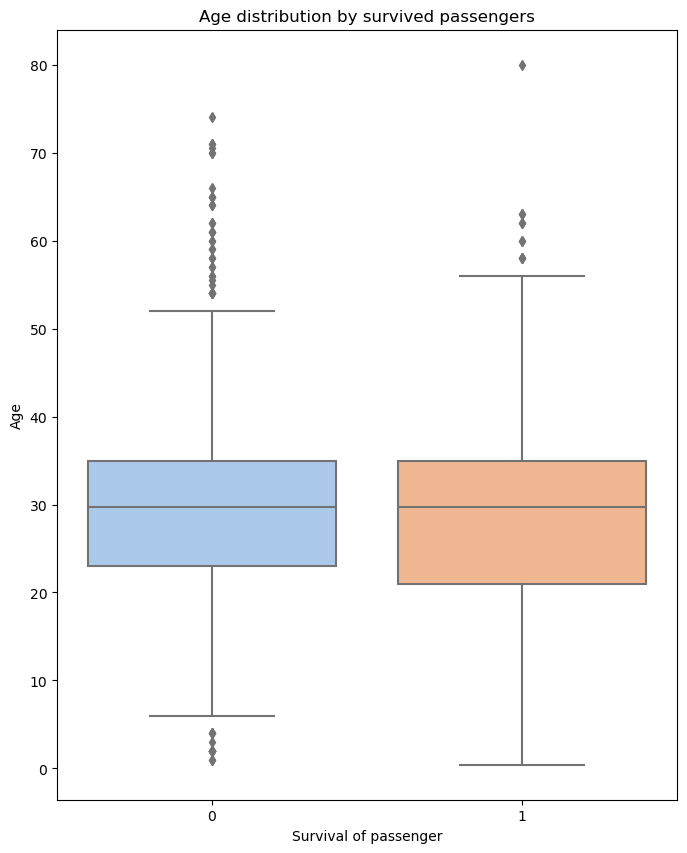

In [21]:
# Boxplot
plt.figure(figsize=(8, 10))
sns.boxplot(data=data, x='Survived', y='Age', palette='pastel')
plt.title('Age distribution by survived passengers')
plt.xlabel('Survival of passenger')
plt.ylabel('Age')
plt.show()

* this graph indicates that there outlier in the data 

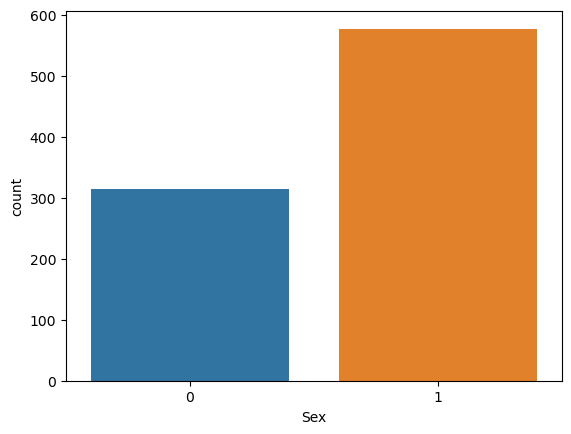

In [24]:
sns.countplot(x="Sex",data=data)# sex= 1: male ,0: female 
plt.xlabel("Sex")
plt.ylabel("count")
plt.show()

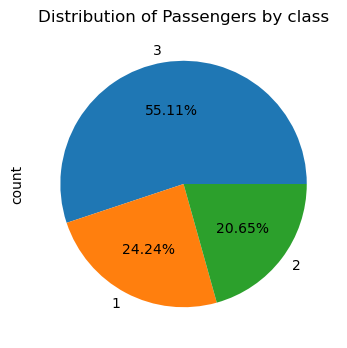

In [23]:
data["Pclass"].value_counts().plot.pie(autopct="%1.2f%%",figsize=(4,4),title=('Distribution of Passengers by class'))
import matplotlib.pyplot as plt
plt.show()

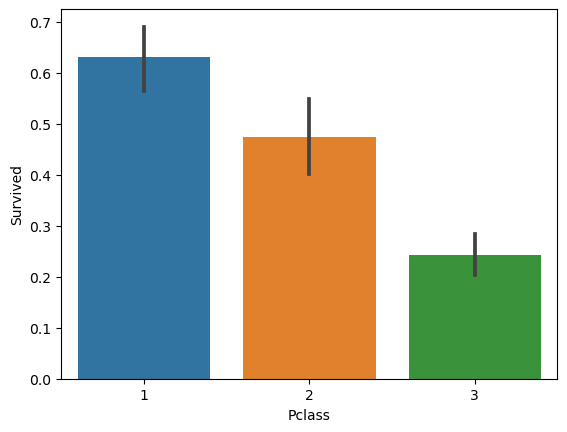

In [25]:
import seaborn as sns
sns.barplot(x="Pclass",y="Survived",data=data)
plt.show()

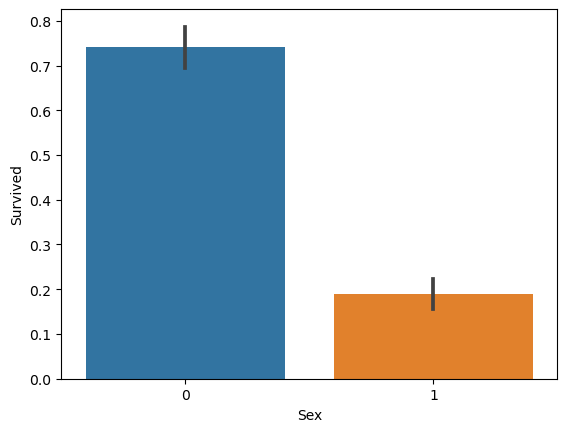

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 
ax=sns.barplot(x="Sex",y="Survived",data=data)
plt.show()

 ## Model building

* Dependent Variable : Passenger Survival
* Independent variable : Age, Sex, Fare, Embarked, SibSp, Parch	

In [27]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [28]:
# Train and test split
X=data[["Age","Sex","Fare","Embarked","SibSp","Parch"]]
Y=data["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=5)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 6), (179, 6), (712,), (179,))

## Naive Bayes algorithm

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train,Y_train)
y_pred=gnb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [31]:
# Accuracy 
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8268156424581006


In [31]:
# Classification report
from sklearn.metrics import classification_report
report=classification_report(Y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76        68

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



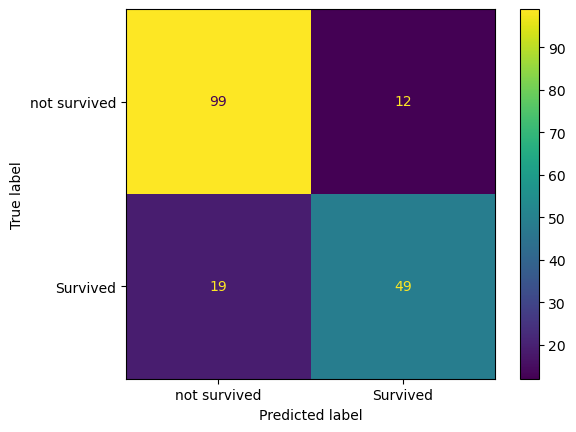

In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred,labels=gnb.classes_)
cm
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
ky_pred=knn.predict(X_test)
ky_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [36]:
accuracy=accuracy_score(Y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8268156424581006


In [37]:
print("Classification Report:\n",classification_report(Y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76        68

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



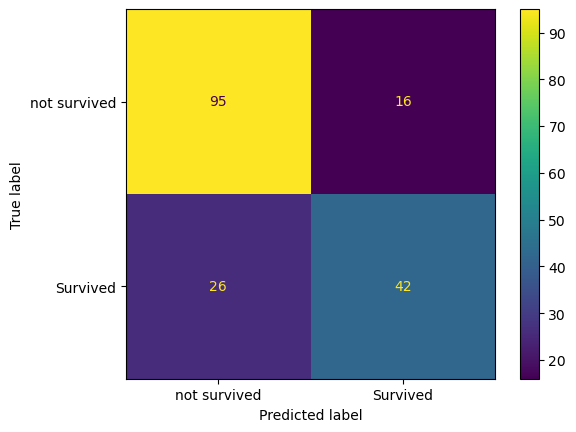

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,ky_pred,labels=gnb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

## Decision Tree classifier 

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
dt=DecisionTreeClassifier(random_state=42)

In [41]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
dy_pred=dt.predict(X_test)
dy_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [43]:
accuracy=accuracy_score(Y_test,dy_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8044692737430168


In [44]:
print("Classification Report:\n",classification_report(Y_test,dy_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       111
           1       0.77      0.69      0.73        68

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



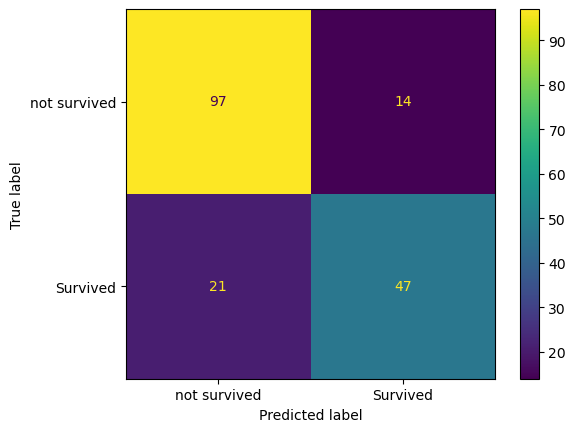

In [45]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,dy_pred,labels=gnb.classes_)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not survived","Survived"])
cm_dis.plot()

In [46]:
models={'Navie Bayes':GaussianNB(),'K-Nearst-Neighbors':KNeighborsClassifier(n_neighbors=5),'Decision tree':DecisionTreeClassifier(random_state=5)}
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [47]:
R=[]
for model_name, model in models.items():
    model.fit(X_train,Y_train)
    predict_y=model.predict(X_test)
    accuracy=accuracy_score(Y_test,predict_y)
    precision=precision_score(Y_test,predict_y)
    recall=recall_score(Y_test,predict_y)
    R.append({'Model':model_name,'Accuracy':accuracy,'Precision':precision,'Recall':recall})

In [48]:
import pandas as pd
comparison=pd.DataFrame(R)
print(comparison)

                Model  Accuracy  Precision    Recall
0         Navie Bayes  0.826816   0.803279  0.720588
1  K-Nearst-Neighbors  0.765363   0.724138  0.617647
2       Decision tree  0.810056   0.774194  0.705882


###  from the above output Navie Bayes model is good .